In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Baseline Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Production Code
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
data = pd.read_csv('data/Train.csv')

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. Basic Exploratory Data Analysis (EDA)

In [3]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

In [5]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


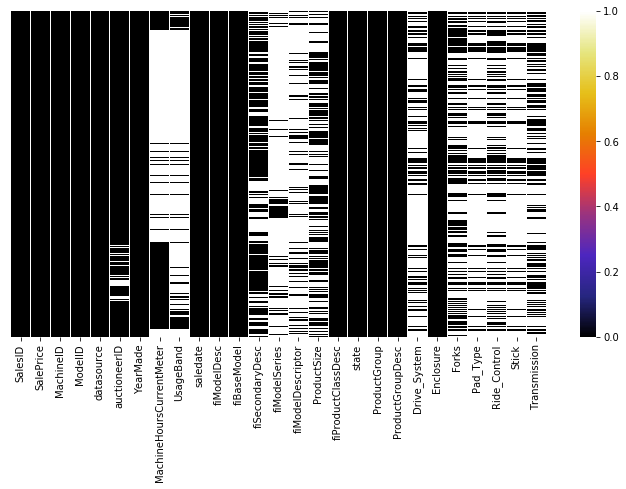

In [6]:
# White block is missing data
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,:27].isnull(), yticklabels=False, cbar=True,cmap='CMRmap')

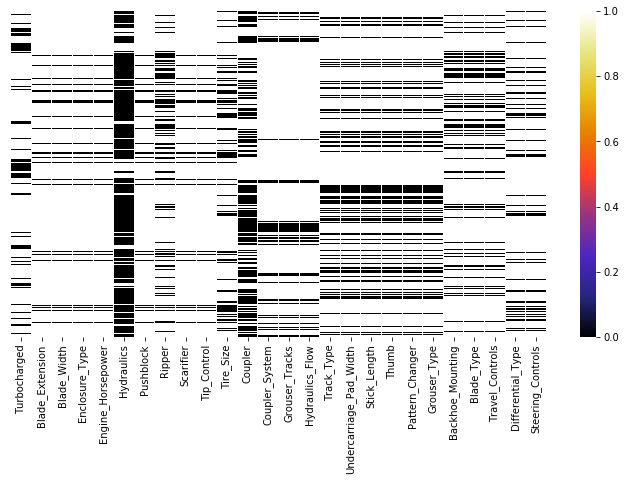

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,27:].isnull(), yticklabels=False, cbar=True, cmap='CMRmap')

### Train Test (Validation) Split to perform EDA only on Train Data

In [8]:
X = data.iloc[:, 2:] # exclude SalesID due to it's distinct key
y = data.iloc[:, 1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [10]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (280787, 51)
X_test Shape: (120338, 51)
y_train Shape: (280787,)
y_test Shape: (120338,)


In [11]:
X_train.head()

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,700814,3542,121,3.0,2005,1911.0,Medium,1/29/2010 0:00,420D,420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1312350,17311,132,99.0,2004,1603.0,Medium,11/18/2009 0:00,S175,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,911366,3877,149,99.0,1987,32767.0,Medium,7/15/2010 0:00,980C,980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
3,660682,13864,149,1.0,1994,NaN,NaN,12/6/2011 0:00,D6HIIXL,D6,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
4,1315090,6634,132,17.0,1997,NaN,NaN,4/24/2007 0:00,1845,1845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def feature_summary(data):
    summary = []
    
    for i in data.columns:
        x = data[i]
        missing_ratio = sum(x.isnull())/len(x)
        unique_ratio = len(x.value_counts())/len(x)
        categories = len(x.value_counts())
        
        summary.append({'Feature':i, 
                        'Missing':missing_ratio, 
                        'Unique':unique_ratio, 
                        'Categories':categories, 
                        'Type':type(x.iloc[0])})
       
    
    return(pd.DataFrame(summary)[['Feature','Missing','Unique','Categories','Type']])

In [13]:
f_summary = feature_summary(X_train)
f_summary

,Feature,Missing,Unique,Categories,Type
0,MachineID,0.000000,0.886070,248797,<class 'numpy.int64'>
1,ModelID,0.000000,0.017369,4877,<class 'numpy.int64'>
2,datasource,0.000000,0.000018,5,<class 'numpy.int64'>
3,auctioneerID,0.049977,0.000107,30,<class 'numpy.float64'>
4,YearMade,0.000000,0.000253,71,<class 'numpy.int64'>
5,MachineHoursCurrentMeter,0.644253,0.047641,13377,<class 'numpy.float64'>
6,UsageBand,0.826652,0.000011,3,<class 'str'>
7,saledate,0.000000,0.013719,3852,<class 'str'>
8,fiModelDesc,0.000000,0.016657,4677,<class 'str'>
9,fiBaseModel,0.000000,0.006642,1865,<class 'str'>


1. `MachineID`: 88.6% of values are unique, 11.4% of machines are duplicated. __Should capture the machines with duplicated ID__

2. `ModelID`: Only 1.7% are unique, implying there are a set of different `Models` for all the Machines. __Should convert ModelID into a categorical feature__

3. `datasource`: Less than 0.002% values are unique, implying there are only only a few different datasource. __Should convert `datasource` into a categorical feature__

4. `auctioneerID`: Only 5% values are unique, implying there are a set of different `auctioneer`. __Should be converted into a categorical feature__

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Cannot plot feature: "UsageBand"
Cannot plot feature: "ProductSize"
Cannot plot feature: "fiProductClassDesc"
Cannot plot feature: "state"


<Figure size 864x432 with 0 Axes>

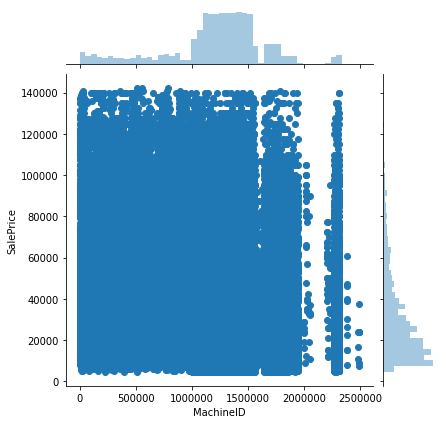

<Figure size 864x432 with 0 Axes>

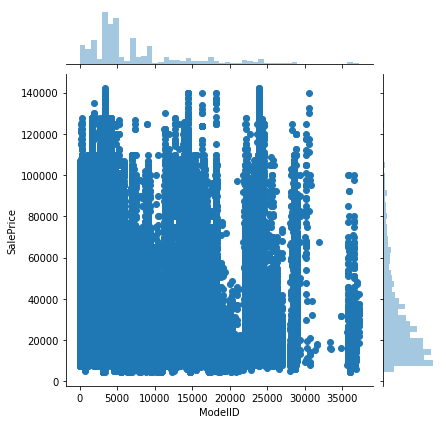

<Figure size 864x432 with 0 Axes>

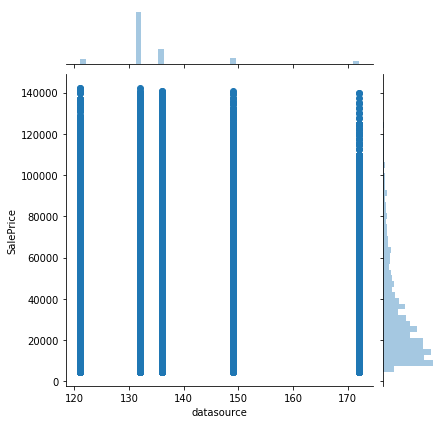

<Figure size 864x432 with 0 Axes>

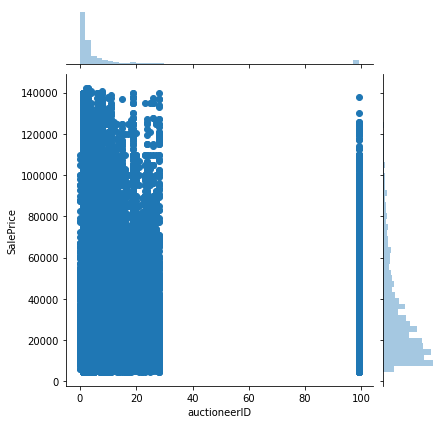

<Figure size 864x432 with 0 Axes>

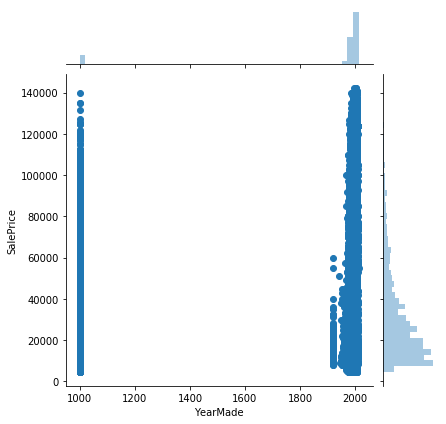

<Figure size 864x432 with 0 Axes>

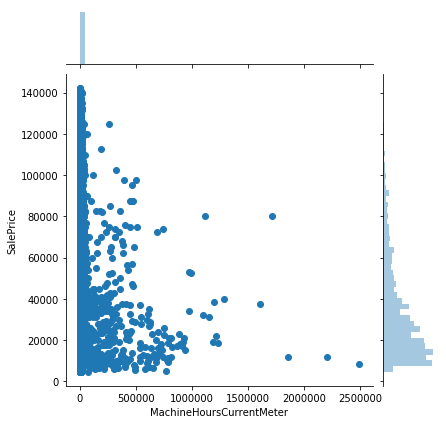

<Figure size 864x432 with 0 Axes>

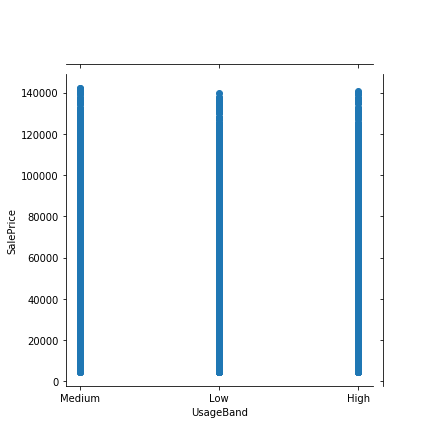

<Figure size 864x432 with 0 Axes>

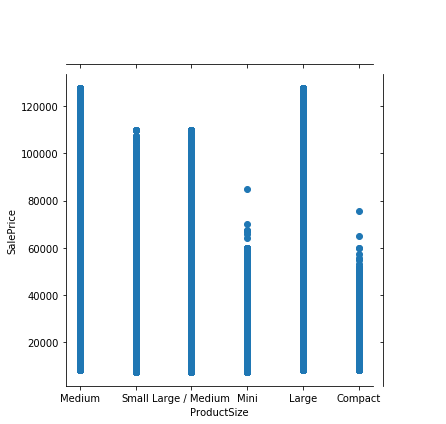

<Figure size 864x432 with 0 Axes>

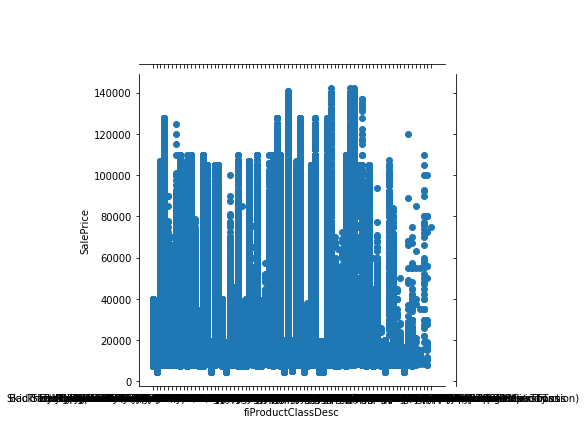

<Figure size 864x432 with 0 Axes>

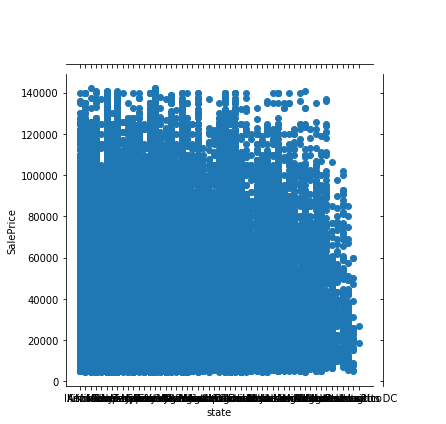

In [14]:
for i in ['MachineID','ModelID','datasource','auctioneerID','YearMade','MachineHoursCurrentMeter',
          'UsageBand','ProductSize','fiProductClassDesc','state']:
    try:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=X_train[i], y=y_train)
    except:
        print('Cannot plot feature: "{}"'.format(i))

Cannot plot feature: "ProductGroup"
Cannot plot feature: "ProductGroupDesc"
Cannot plot feature: "Enclosure"
Cannot plot feature: "Hydraulics"
Cannot plot feature: "Transmission"
Cannot plot feature: "Forks"
Cannot plot feature: "fiBaseModel"
Cannot plot feature: "Coupler"


<Figure size 864x432 with 0 Axes>

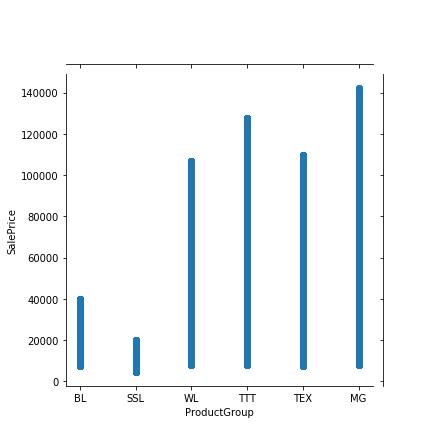

<Figure size 864x432 with 0 Axes>

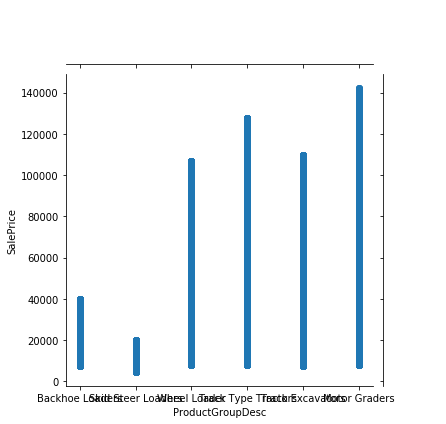

<Figure size 864x432 with 0 Axes>

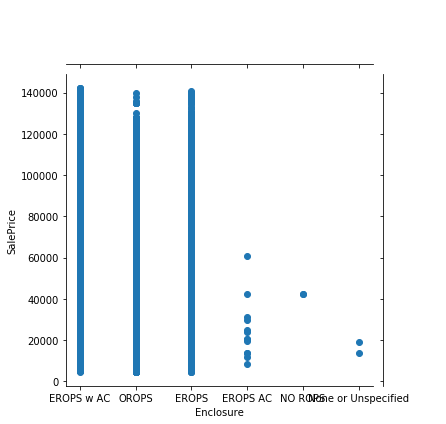

<Figure size 864x432 with 0 Axes>

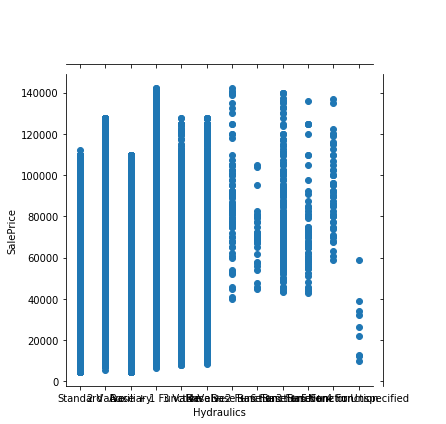

<Figure size 864x432 with 0 Axes>

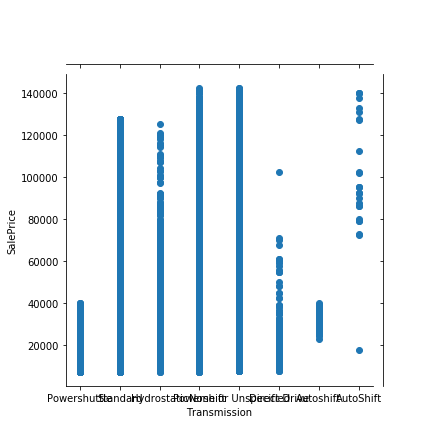

<Figure size 864x432 with 0 Axes>

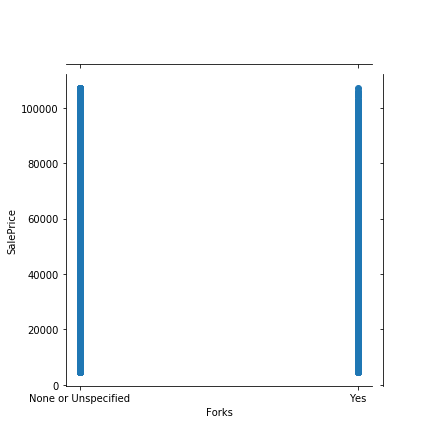

<Figure size 864x432 with 0 Axes>

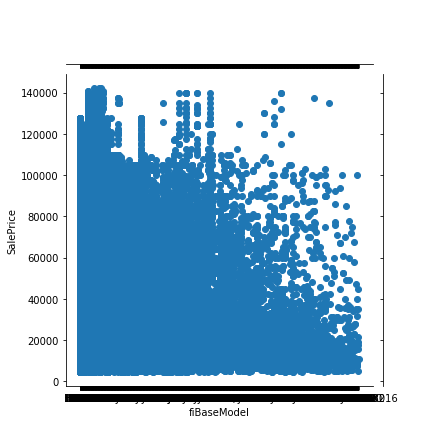

<Figure size 864x432 with 0 Axes>

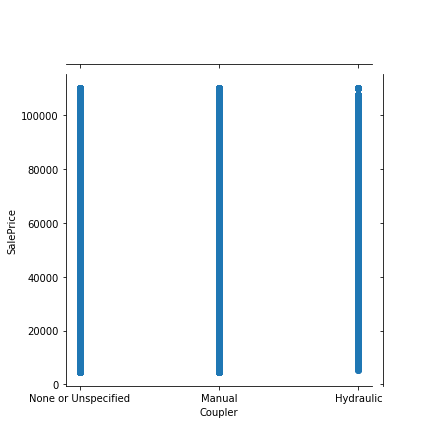

In [15]:
for i in ['ProductGroup','ProductGroupDesc','Enclosure','Hydraulics','Transmission','Forks',
          'fiBaseModel','Coupler']:
    try:
        plt.figure(figsize=(12,6))
        sns.jointplot(x=X_train[i], y=y_train)
    except:
        print('Cannot plot feature: "{}"'.format(i))

### Insights from the distribution pairplots

We select several features that is (1)numerical, or (2) low missing rate, or (3) not too many categories (different values) to plot the relationship against the `SalePrice`.

From the above charts, we can find several insights:

1. There are certain `MachineID`s have a huge volume.

2. Some `ModelIDs` have `SalePrice` cap.

3. `YearMade` has a huge amount of datapoint with value __1000__, which should be a fallacious data or representation of missing value. No machine can still be functioning if it's producted 1000 years ago.

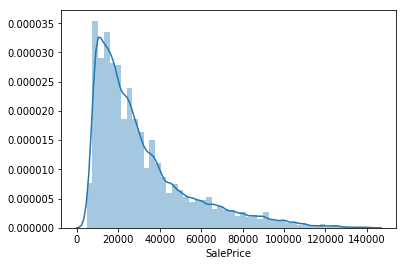

In [16]:
sns.distplot(y_train)

### 2. Data Preprocessing

1. Convert `saledate` into __datetime__ format.

2. Replace the `1000` in `YearMade` with the mean value.

3. One hot encoding categorical features.

4. (Optional) Calculate aggregated statistics (mean/stand deviation) for each `MachineID` and `ModelID`.

In [17]:
X_train['sale_year'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').year for i in X_train['saledate']]
X_train['sale_month'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in X_train['saledate']]
X_train['sale_day'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').day for i in X_train['saledate']]

year_made_mean = round(X_test.loc[X_test['YearMade']!=1000, ['YearMade']].mean())

X_train.loc[X_train['YearMade']==1000,['YearMade']] = year_made_mean

X_train['auctioneerID_str'] = [str(i) for i in X_train['auctioneerID']]

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [18]:
one_hot_encoding_categories = ['auctioneerID_str','ProductSize','fiProductClassDesc','state',
                               'ProductGroup','Enclosure','Forks','Hydraulics','Coupler','Transmission']

one_hot_encoders = {}
one_hot_encoding_columns = []

for i in one_hot_encoding_categories:
    enc = OneHotEncoder(handle_unknown='ignore').fit(X_train.loc[:,[i]].fillna('Nan').values)
    one_hot_encoders[i] = enc
    
    column_name = [i+'_'+c for c in enc.categories_[0]]
    table = enc.transform(X_train.loc[:,[i]].fillna('Nan').values).toarray()

    add_features = pd.DataFrame(table,columns=column_name)
    
    X_train = pd.concat([X_train,add_features],axis=1)
    one_hot_encoding_columns = one_hot_encoding_columns + column_name
    print('Feature: {0}\nencoded shape: {1}, X_train shape: {2}'.format(i, table.shape, X_train.shape))

Feature: auctioneerID_str
encoded shape: (280787, 31), X_train shape: (280787, 86)
Feature: ProductSize
encoded shape: (280787, 7), X_train shape: (280787, 93)
Feature: fiProductClassDesc
encoded shape: (280787, 73), X_train shape: (280787, 166)
Feature: state
encoded shape: (280787, 53), X_train shape: (280787, 219)
Feature: ProductGroup
encoded shape: (280787, 6), X_train shape: (280787, 225)
Feature: Enclosure
encoded shape: (280787, 7), X_train shape: (280787, 232)
Feature: Forks
encoded shape: (280787, 3), X_train shape: (280787, 235)
Feature: Hydraulics
encoded shape: (280787, 13), X_train shape: (280787, 248)
Feature: Coupler
encoded shape: (280787, 4), X_train shape: (280787, 252)
Feature: Transmission
encoded shape: (280787, 9), X_train shape: (280787, 261)


In [19]:
X_test['sale_year'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').year for i in X_test['saledate']]
X_test['sale_month'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in X_test['saledate']]
X_test['sale_day'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').day for i in X_test['saledate']]
X_test.loc[X_test['YearMade']==1000,['YearMade']] = year_made_mean
X_test['auctioneerID_str'] = [str(i) for i in X_test['auctioneerID']]

for i in one_hot_encoding_categories:
    enc = one_hot_encoders[i]
    
    column_name = [i+'_'+c for c in enc.categories_[0]]
    table = enc.transform(X_test.loc[:,[i]].fillna('Nan').values).toarray()

    add_features = pd.DataFrame(table,columns=column_name)
    
    X_test = pd.concat([X_test,add_features],axis=1)
    print('Feature: {0}\nencoded shape: {1}, X_test shape: {2}'.format(i, table.shape, X_test.shape))

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Feature: auctioneerID_str
encoded shape: (120338, 31), X_test shape: (120338, 86)
Feature: ProductSize
encoded shape: (120338, 7), X_test shape: (120338, 93)
Feature: fiProductClassDesc
encoded shape: (120338, 73), X_test shape: (120338, 166)
Feature: state
encoded shape: (120338, 53), X_test shape: (120338, 219)
Feature: ProductGroup
encoded shape: (120338, 6), X_test shape: (120338, 225)
Feature: Enclosure
encoded shape: (120338, 7), X_test shape: (120338, 232)
Feature: Forks
encoded shape: (120338, 3), X_test shape: (120338, 235)
Feature: Hydraulics
encoded shape: (120338, 13), X_test shape: (120338, 248)
Feature: Coupler
encoded shape: (120338, 4), X_test shape: (120338, 252)
Feature: Transmission
encoded shape: (120338, 9), X_test shape: (120338, 261)


In [20]:
selected_features = ['YearMade','MachineHoursCurrentMeter','sale_year','sale_month','sale_day'] + one_hot_encoding_columns

### 2. Build a Baseline Model

In [21]:
# Benchmark model: Predict with y_train.mean()
np.sqrt(mean_squared_error(y_test, np.repeat(y_train.mean(), len(y_test))))

22994.75468305723

In [22]:
# Baseline model - Linear Regression
reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elasticNet = ElasticNet()

reg.fit(X_train[selected_features].fillna(0), y_train)
lasso.fit(X_train[selected_features].fillna(0), y_train)
ridge.fit(X_train[selected_features].fillna(0), y_train)
elasticNet.fit(X_train[selected_features].fillna(0), y_train)

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13308728082456.672, tolerance: 14924621588.933273
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
xx = X_test[selected_features].fillna(0)

y_pred_reg = reg.predict(xx)

r_square = reg.score(xx, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))

print('Regular Linear Regression')
print('R-Square: {}'.format(round(r_square,3)))
print('RMSE: {}'.format(round(rmse,3)))

Regular Linear Regression
R-Square: 0.521
RMSE: 15908.475


In [24]:
y_pred_lasso = lasso.predict(xx)

r_square = lasso.score(xx, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print('LASSO')
print('R-Square: {}'.format(round(r_square,3)))
print('RMSE: {}'.format(round(rmse,3)))

LASSO
R-Square: 0.521
RMSE: 15910.782


In [25]:
y_pred_ridge = ridge.predict(xx)

r_square = ridge.score(xx, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('Ridge')
print('R-Square: {}'.format(round(r_square,3)))
print('RMSE: {}'.format(round(rmse,3)))

Ridge
R-Square: 0.521
RMSE: 15908.392


In [26]:
y_pred_elasticNet = elasticNet.predict(xx)

r_square = elasticNet.score(xx, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_elasticNet))

print('Elastic Net')
print('R-Square: {}'.format(round(r_square,3)))
print('RMSE: {}'.format(round(rmse,3)))

Elastic Net
R-Square: 0.309
RMSE: 19111.767


C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Linear Regression')

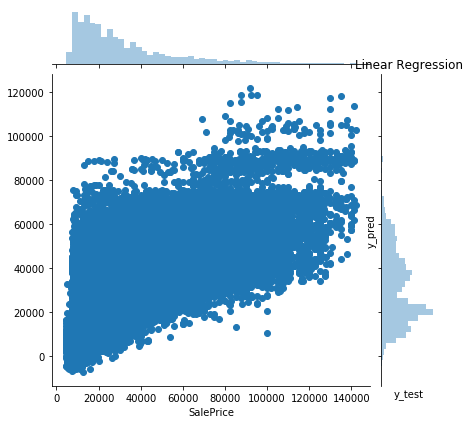

In [27]:
sns.jointplot(x=y_test, y=y_pred_reg)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regression')

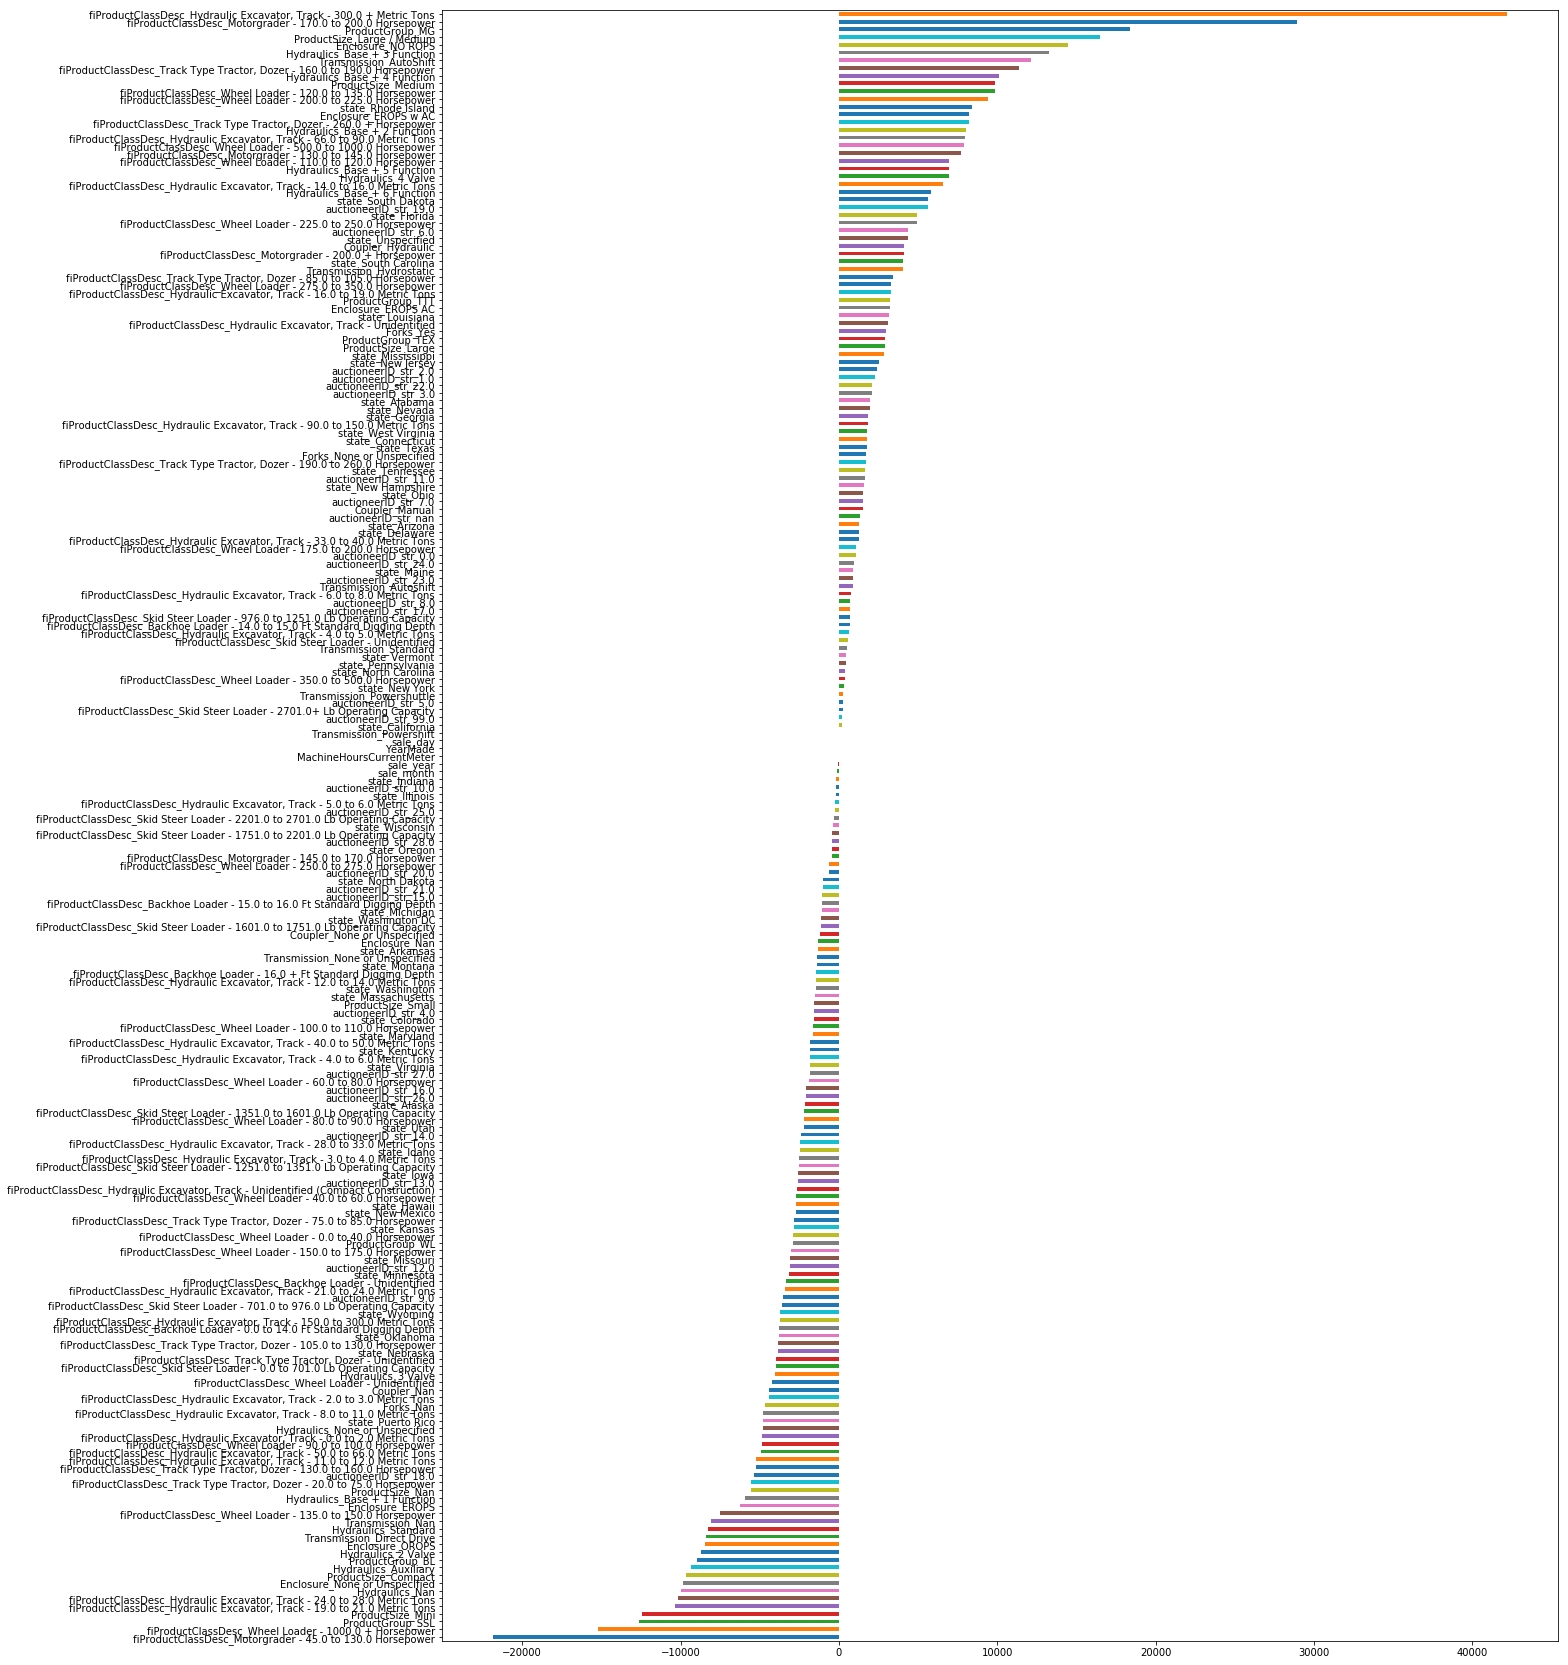

In [28]:
feature_coef = pd.Series(reg.coef_, index=selected_features)

plt.figure(figsize=(20,30))
feature_coef.sort_values().plot('barh')

### Random Forest Model

In [29]:
X = data.iloc[:, 2:] # exclude SalesID due to it's distinct key
y = data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train['sale_year'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').year for i in X_train['saledate']]
X_train['sale_month'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in X_train['saledate']]
X_train['sale_day'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').day for i in X_train['saledate']]

year_made_mean = round(X_train.loc[X_train['YearMade']!=1000, ['YearMade']].mean())

X_train.loc[X_train['YearMade']==1000,['YearMade']] = year_made_mean
X_train['auctioneerID_str'] = [str(i) for i in X_train['auctioneerID']]
X_train.loc[X_train['MachineHoursCurrentMeter'].isna(), ['MachineHoursCurrentMeter']] = 0
X_train.loc[X_train['YearMade'].isna(), ['YearMade']] = 0


X_test['sale_year'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').year for i in X_test['saledate']]
X_test['sale_month'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in X_test['saledate']]
X_test['sale_day'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').day for i in X_test['saledate']]
X_test.loc[X_test['YearMade']==1000,['YearMade']] = year_made_mean
X_test['auctioneerID_str'] = [str(i) for i in X_test['auctioneerID']]
X_test.loc[X_test['MachineHoursCurrentMeter'].isna(), ['MachineHoursCurrentMeter']] = 0
X_test.loc[X_test['YearMade'].isna(), ['YearMade']] = 0

one_hot_encoding_categories = ['auctioneerID_str','ProductSize','fiProductClassDesc','state',
                               'ProductGroup','Enclosure','Forks','Hydraulics','Coupler','Transmission']
one_hot_encoders = {}
one_hot_encoding_columns = []

for i in one_hot_encoding_categories:
    enc = OneHotEncoder(handle_unknown='ignore').fit(X_train.loc[:,[i]].fillna('Nan').values)
    one_hot_encoders[i] = enc
    
    column_name = [i+'_'+c for c in enc.categories_[0]]
    table = enc.transform(X_train.loc[:,[i]].fillna('Nan').values).toarray()

    add_features = pd.DataFrame(table,columns=column_name)
    
    X_train = pd.concat([X_train,add_features],axis=1)
    one_hot_encoding_columns = one_hot_encoding_columns + column_name
    print('Feature: {0}\nencoded shape: {1}, X_train shape: {2}'.format(i, table.shape, X_train.shape))
    

for i in one_hot_encoding_categories:
    enc = one_hot_encoders[i]
    
    column_name = [i+'_'+c for c in enc.categories_[0]]
    table = enc.transform(X_test.loc[:,[i]].fillna('Nan').values).toarray()

    add_features = pd.DataFrame(table,columns=column_name)
    
    X_test = pd.concat([X_test,add_features],axis=1)
    print('Feature: {0}\nencoded shape: {1}, X_test shape: {2}'.format(i, table.shape, X_test.shape))

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Feature: auctioneerID_str
encoded shape: (280787, 31), X_train shape: (280787, 86)
Feature: ProductSize
encoded shape: (280787, 7), X_train shape: (280787, 93)
Feature: fiProductClassDesc
encoded shape: (280787, 73), X_train shape: (280787, 166)
Feature: state
encoded shape: (280787, 53), X_train shape: (280787, 219)
Feature: ProductGroup
encoded shape: (280787, 6), X_train shape: (280787, 225)
Feature: Enclosure
encoded shape: (280787, 7), X_train shape: (280787, 232)
Feature: Forks
encoded shape: (280787, 3), X_train shape: (280787, 235)
Feature: Hydraulics
encoded shape: (280787, 13), X_train shape: (280787, 248)
Feature: Coupler
encoded shape: (280787, 4), X_train shape: (280787, 252)
Feature: Transmission
encoded shape: (280787, 9), X_train shape: (280787, 261)
Feature: auctioneerID_str
encoded shape: (120338, 31), X_test shape: (120338, 86)
Feature: ProductSize
encoded shape: (120338, 7), X_test shape: (120338, 93)
Feature: fiProductClassDesc
encoded shape: (120338, 73), X_test s

In [30]:
selected_features = ['YearMade','MachineHoursCurrentMeter','sale_year','sale_month','sale_day'] + one_hot_encoding_columns

rf = RandomForestRegressor(n_estimators=200, n_jobs=4)
rf.fit(X_train[selected_features].fillna(0), y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
xx = X_test[selected_features].fillna(0)

y_pred_rf = rf.predict(xx)

r_square = rf.score(xx, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('Random Forest')
print('R-Square: {}'.format(round(r_square,3)))
print('RMSE: {}'.format(round(rmse,3)))

Random Forest
R-Square: 0.833
RMSE: 9399.408


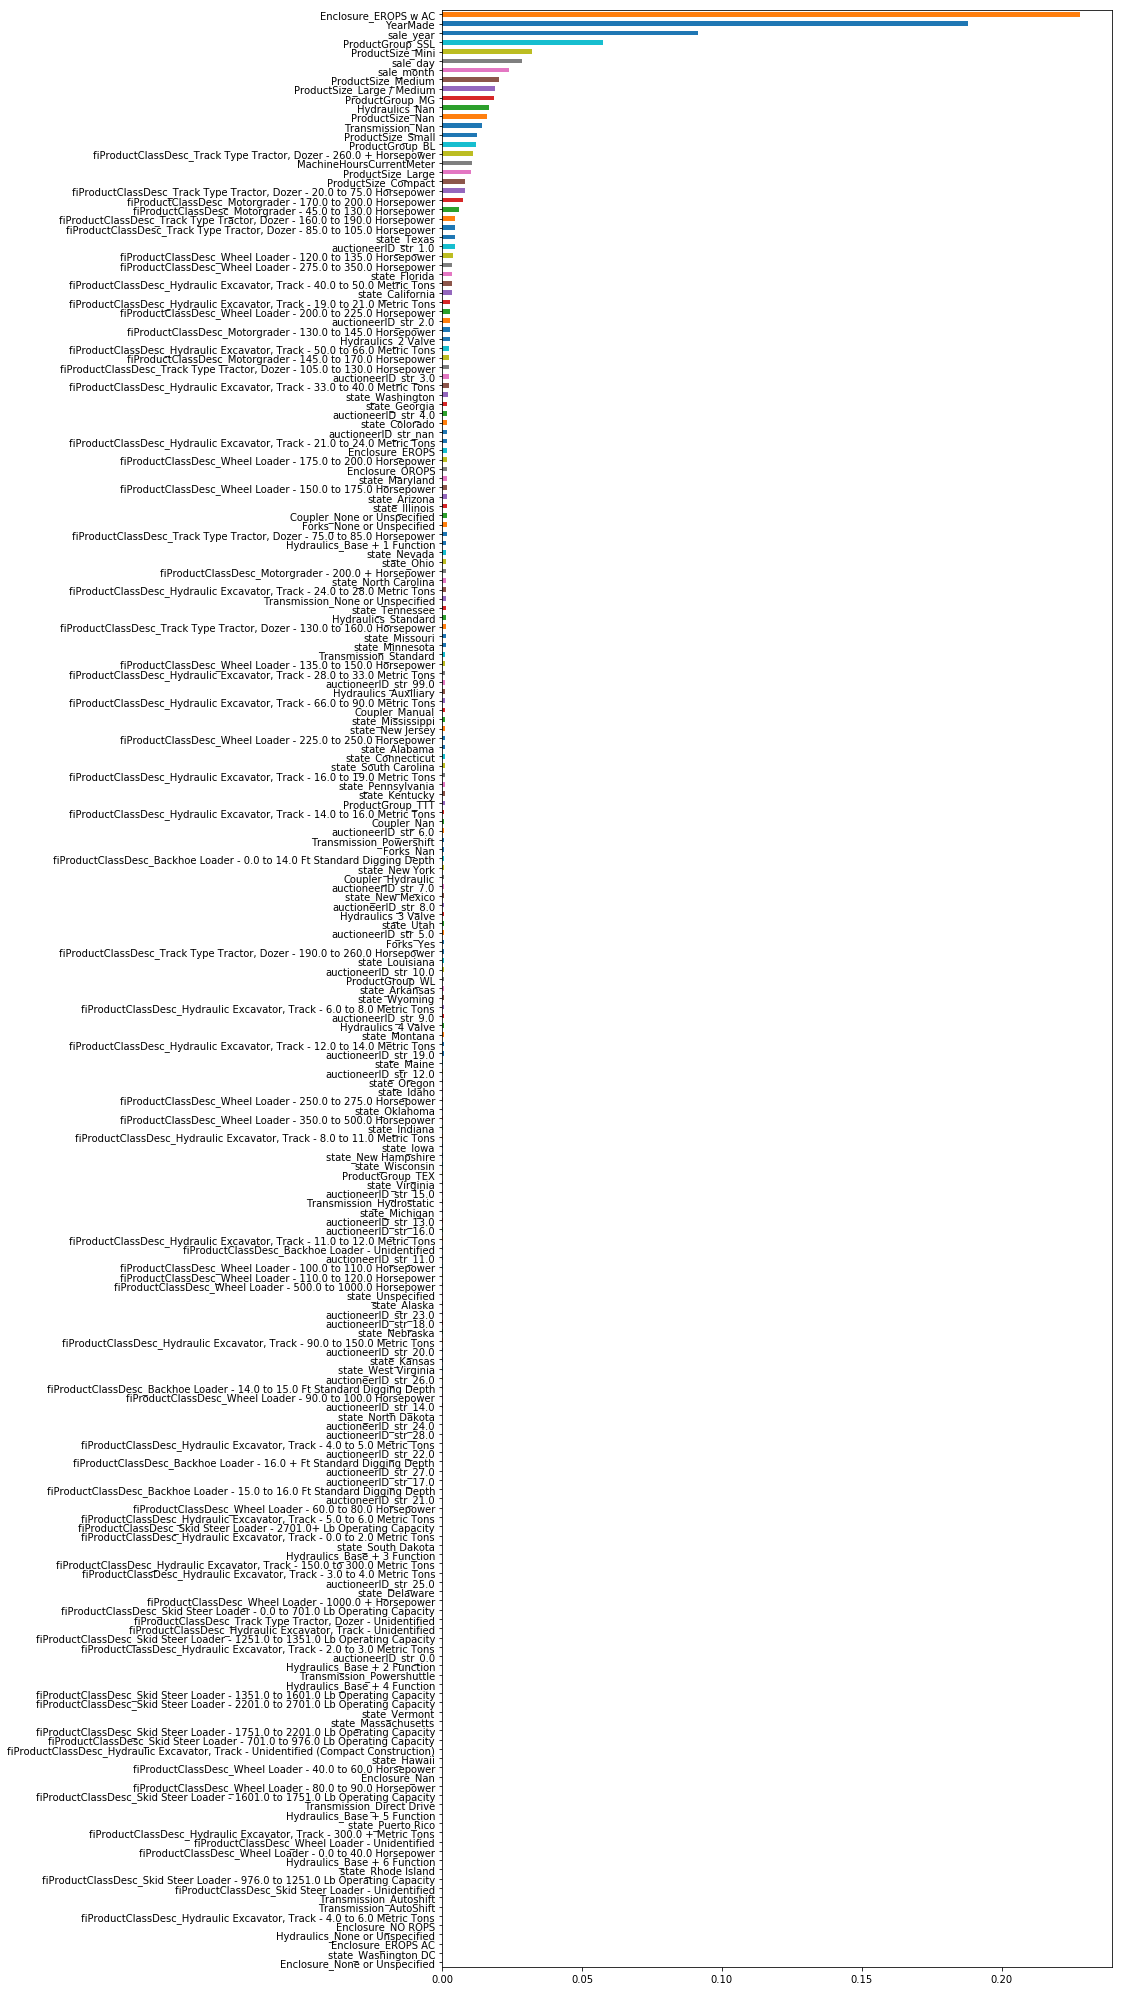

In [32]:
plt.figure(figsize=(12,36))
feature_importances = pd.Series(rf.feature_importances_)
feature_importances.index = selected_features
feature_importances = feature_importances.sort_values()
feature_importances.plot('barh')

### XGBoosting

In [33]:
xgb = XGBRegressor(max_depth=10)

xgb.fit(X_train[selected_features].fillna(0), y_train)

C:\Users\s4302\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:46:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
y_pred_xgb = xgb.predict(xx)

r_square = xgb.score(xx, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print('Random Forest')
print('R-Square: {}'.format(round(r_square,3)))
print('RMSE: {}'.format(round(rmse,3)))

Random Forest
R-Square: 0.825
RMSE: 9609.229


## 3. Production Code

In [132]:
class yearMadeImputing(TransformerMixin):
    
    def fit(self, X, y):
        '''
        Impute the 'year_made' column that has value of 1000 with average value of the feature; 
                                           has value of Null with 0
        '''
        self.year_made_mean = round(X.loc[X['YearMade'] != 1000, ['YearMade']].mean())
        return(self)
        
    def transform(self, X):
        X = X.copy()
        X.loc[X['YearMade']==1000,['YearMade']] = self.year_made_mean
        X.loc[X['YearMade'].isna(), ['YearMade']] = 0
        return(X)

In [133]:
class nullValueImputing(TransformerMixin):
    
    def fit(self, X, y):
        '''
        Impute float type columns missing value with 0
        '''
        return(self)
    
    def transform(self, X):
        X = X.copy()
        return(X.fillna(0))

In [134]:
class oneHotEncoding(TransformerMixin):
    
    def fit(self, X, y):
        self.one_hot_encoding_categories = ['auctioneerID_str','ProductSize','fiProductClassDesc','state',
                                    'ProductGroup','Enclosure','Forks','Hydraulics','Coupler','Transmission']
        self.one_hot_encoders = {}
        self.one_hot_encoding_columns = []
        
    
        XX = X.copy()
        XX.reset_index(drop=True, inplace=True)
        
        for i in self.one_hot_encoding_categories:
            enc = OneHotEncoder(handle_unknown='ignore').fit(XX.loc[:, [i]].fillna('Nan').values)
            self.one_hot_encoders[i] = enc
            
            column_name = [i+'_'+c for c in enc.categories_[0]]
            table = enc.transform(XX.loc[:, [i]].fillna('Nan').values).toarray()
            
            add_features = pd.DataFrame(table, columns=column_name)
            XX = pd.concat([XX, add_features], axis=1)
            self.one_hot_encoding_columns = self.one_hot_encoding_columns + column_name
            
        return(self)
    
    def transform(self, X):
        XX = X.copy()
        XX.reset_index(drop=True, inplace=True)
        
        for i in self.one_hot_encoding_categories:
            enc = self.one_hot_encoders[i]
            
            column_name = [i+'_'+c for c in enc.categories_[0]]
            table = enc.transform(XX.loc[:, [i]].fillna('Nan').values).toarray()
            
            add_features = pd.DataFrame(table, columns=column_name)
            
            XX = pd.concat([XX, add_features], axis=1)
            
        selected_features = ['YearMade','MachineHoursCurrentMeter','sale_year','sale_month','sale_day'] + self.one_hot_encoding_columns
        
        return(XX[selected_features])

In [135]:
pipeline = Pipeline([('yearMade imputing', yearMadeImputing()), 
                     ('OneHotEncoding', oneHotEncoding()),
                     ('null value imputing', nullValueImputing()), 
                     ('model', RandomForestRegressor(n_jobs=-1))])

In [54]:
data = pd.read_csv('data/Train.csv')

X = data.iloc[:, 2:] # exclude SalesID due to it's distinct key
y = data.iloc[:, 1]

# Formatting
X['sale_year'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').year for i in X['saledate']]
X['sale_month'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in X['saledate']]
X['sale_day'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').day for i in X['saledate']]
X['auctioneerID_str'] = [str(i) for i in X['auctioneerID']]

#X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [55]:
selected_feature = ['YearMade','MachineHoursCurrentMeter','sale_year','sale_month','sale_day',
                    'auctioneerID_str','ProductSize','fiProductClassDesc','state','ProductGroup',
                    'Enclosure','Forks','Hydraulics','Coupler','Transmission']

In [148]:
pipeline.fit(X_train[selected_feature], y_train)

Pipeline(memory=None,
         steps=[('yearMade imputing',
                 <__main__.yearMadeImputing object at 0x000001C88C7262E8>),
                ('OneHotEncoding',
                 <__main__.oneHotEncoding object at 0x000001C88C726320>),
                ('null value imputing',
                 <__main__.nullValueImputing object at 0x000001C88C7262B0>),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1

In [149]:
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Random Forest')
print('RMSE: {}'.format(round(rmse,3)))

Random Forest
RMSE: 9422.814


In [136]:
n_estimators = [10,50,100,200]
max_depth = [None, 5, 10]

param_grid = {'model__n_estimators': n_estimators, 'model__max_depth': max_depth}

In [137]:
gs = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error')

In [138]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('yearMade imputing',
                                        <__main__.yearMadeImputing object at 0x000001C88C7262E8>),
                                       ('OneHotEncoding',
                                        <__main__.oneHotEncoding object at 0x000001C88C726320>),
                                       ('null value imputing',
                                        <__main__.nullValueImputing object at 0x000001C88C7262B0>),
                                       ('model',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_al...
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_

In [139]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('yearMade imputing',
                 <__main__.yearMadeImputing object at 0x000001C88DFD9630>),
                ('OneHotEncoding',
                 <__main__.oneHotEncoding object at 0x000001C88DFD9A58>),
                ('null value imputing',
                 <__main__.nullValueImputing object at 0x000001C88DFD99B0>),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=2

In [141]:
y_pred_gs = gs.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_gs))

print('GS - Random Forest')
print('RMSE: {}'.format(round(rmse,3)))

GS - Random Forest
RMSE: 9402.045


### Prediction

In [142]:
test_data = pd.read_csv('data/test.csv')

In [143]:
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [144]:
test_X = test_data.iloc[:, 2:] # exclude SalesID due to it's distinct key

# Formatting
test_X['sale_year'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').year for i in test_X['saledate']]
test_X['sale_month'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in test_X['saledate']]
test_X['sale_day'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').day for i in test_X['saledate']]
test_X['auctioneerID_str'] = [str(i) for i in test_X['auctioneerID']]

In [145]:
test_y_pred = gs.predict(test_X)

In [150]:
pd.Series(test_y_pred, index=test_data['SalesID'])#.to_csv('prediction.csv')